## LENDING CLUB CASE STUDY 

### The analysis is divided into:

#### 1.Data understanding
#### 2.Data cleaning (cleaning missing values, removing redundant columns etc.)
#### 3.Data Analysis

### 1. Data loading and understanding

In [23]:
import pandas as pd
loan=pd.read_csv("loan.csv",encoding="ISO-8859-1",low_memory=False)
loan.shape

(39717, 111)

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [26]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [27]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### the loan data has 111 columns and 39717 rows. Now we clean up the data i.e remove columns having  null values in large number

## 2. Data Cleaning
##### Some columns have a large number of missing values

In [28]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [13]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


#### above  we  can see that most of the columns are completely empty so we will drop such columns first

In [29]:
drop_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
loan = loan.drop(drop_columns, axis=1)

In [30]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Now we can see that there are two columns having 64% and 33% null values. so now we will check the data in these columns and then decide whether to drop them or not

In [31]:
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


### desc column contains the comments of the applicants when applying for loan and mths_since_last_deliq is the column having the number of months since the borrower's last delinquency. So these two columns will not help us to identify whether the person is defaulter or not so we can drop these columns

In [32]:
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [34]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

## Now we need to check some rows also.Need to decide whether to drop the orws having larger number of data as null or not

In [35]:
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [36]:
loan[loan.isnull().sum(axis=1) > 5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


### we have no row having more than 5 values empty we are good with columns and rows till now

## 3. DATA FORMAT

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

### int_rate is the object type i want to convert it in to float as it contains '%'

In [38]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [39]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

### if we see emp_length in excel data so it has years,'<' symbol in it. we want only numeric data from that. so for that will use regular expression

In [40]:
loan = loan[~loan['emp_length'].isnull()]
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0]) # findall function returns string array so i want only first vealue from that
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

## 4. DATA ANALYSIS

### we need to identify whether we should accept or reject the loan application on the basis of default rate. For that there are three types of variables that we can use for data analysis:
#### 1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
#### 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.)
#### 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).
##### now to note that customer behaviour variables will not be available at the time of filling loan application. So we cannot use them for analysis. we are now left with 2 types of variables we will drop these columns now

In [42]:
Cutomer_behaviour =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type","title", "url", "zip_code", "addr_state"]

In [43]:
loan_final=loan.drop(Cutomer_behaviour, axis=1)

In [44]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [45]:
loan_final['loan_status'] = loan_final['loan_status'].astype('category')
loan_final['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

#### Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

#### Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

#### Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

##### current will not be used for the analysis. so will drop the data having loan_status as current

### For Fully_paid will assign '1' for Charged_off assign '0'

In [46]:
loan_final = loan_final[loan_final['loan_status'] != 'Current']
loan_final['loan_status'] = loan_final['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [47]:
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 28 columns):
id                            37544 non-null int64
member_id                     37544 non-null int64
loan_amnt                     37544 non-null int64
funded_amnt                   37544 non-null int64
funded_amnt_inv               37544 non-null float64
term                          37544 non-null object
int_rate                      37544 non-null float64
installment                   37544 non-null float64
grade                         37544 non-null object
sub_grade                     37544 non-null object
emp_title                     36136 non-null object
emp_length                    37544 non-null int64
home_ownership                37544 non-null object
annual_inc                    37544 non-null float64
verification_status           37544 non-null object
issue_d                       37544 non-null object
loan_status                   37544 non-null int64
pymnt_pla

In [48]:
loan_final['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## 5. UNIVARIATE ANALYSIS

In [52]:
print(round(np.mean(loan_final['loan_status']),2))

0.14


##### default rate overall is 14%

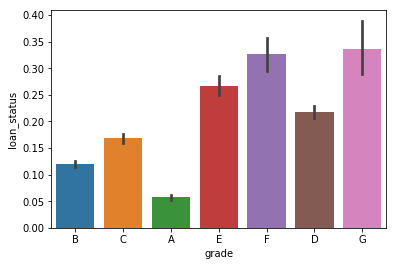

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='grade',y='loan_status',data=loan_final)
plt.show()

#### We can see that the grades from A to G the default rate increases. This is because the grades are assigned by the compnay on the basis of risk

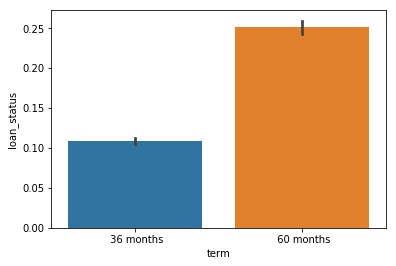

In [56]:
sns.barplot(x='term',y='loan_status',data=loan_final)
plt.show()

### if we give loan for 60 months so it has high default/risk rate as compared  to 36 months

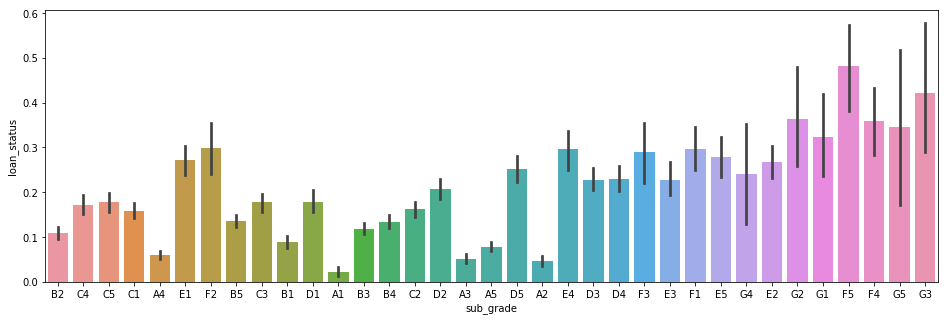

In [57]:
plt.figure(figsize=(16, 5))
sns.barplot(x='sub_grade',y='loan_status',data=loan_final)
plt.show()

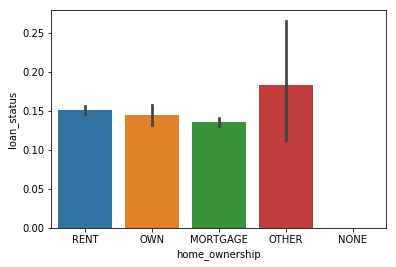

In [58]:
sns.barplot(x='home_ownership',y='loan_status',data=loan_final)
plt.show()

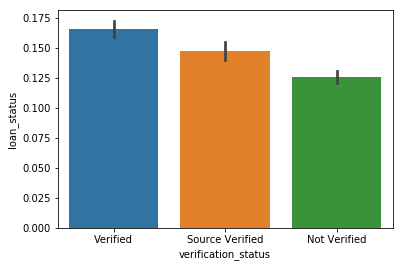

In [59]:
sns.barplot(x='verification_status',y='loan_status',data=loan_final)
plt.show()

### the income which is verified has high default rate as compare to others

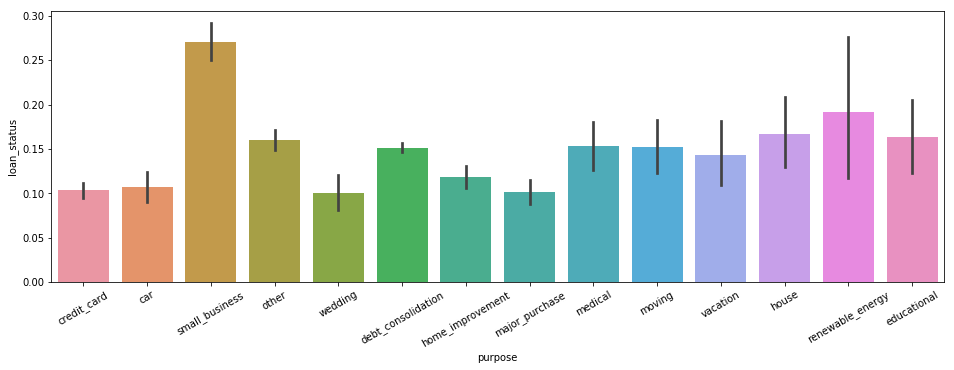

In [62]:
plt.figure(figsize=(16, 5))
plt.xticks(rotation=30)
sns.barplot(x='purpose',y='loan_status',data=loan_final)
plt.show()

### small_business has highest default rate 

## Distribution of loans across years and months

In [63]:
from datetime import datetime
loan_final['issue_d'] = loan_final['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [64]:
loan_final['month'] = loan_final['issue_d'].apply(lambda x: x.month)
loan_final['year'] = loan_final['issue_d'].apply(lambda x: x.year)

In [65]:
loan_final.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [66]:
loan_final.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

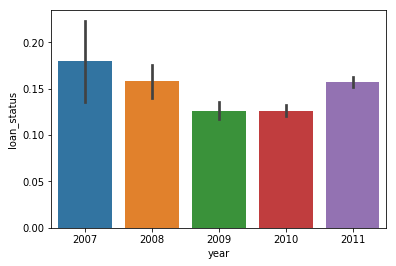

In [67]:
sns.barplot(x='year',y='loan_status',data=loan_final)
plt.show()

### default rate was high in 2007 then it decrease inn 2008 and was constant in 2009 and 10 but then increase in 2011

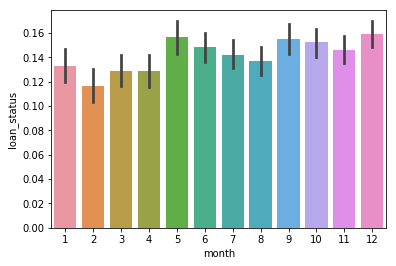

In [68]:
sns.barplot(x='month',y='loan_status',data=loan_final)
plt.show()

### converting loan_amount to low,medium,high,veryhigh scale

In [69]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
loan_final['loan_amnt'] = loan_final['loan_amnt'].apply(lambda x: loan_amount(x))    

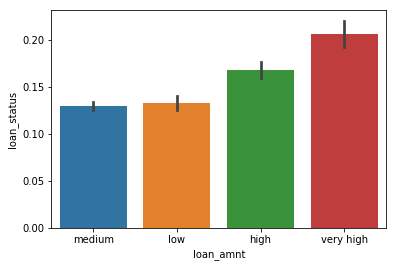

In [71]:
sns.barplot(x='loan_amnt',y='loan_status',data=loan_final)
plt.show()

### so it is clear that loan amount greater than or equal to 25000 has highest default rate

#### similarly we do with funded_amount__inv

In [72]:
loan_final['funded_amnt_inv'] = loan_final['funded_amnt_inv'].apply(lambda x: loan_amount(x))

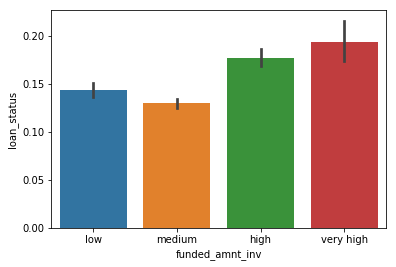

In [73]:
sns.barplot(x='funded_amnt_inv',y='loan_status',data=loan_final)
plt.show()

### so the amount that investors has agreed to given has highest default rate when amount is >= 25000

### similarly converting interest rate

In [74]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
loan_final['int_rate'] = loan_final['int_rate'].apply(lambda x: int_rate(x))    

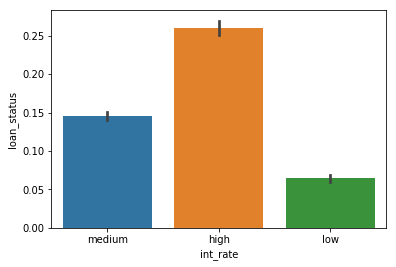

In [75]:
sns.barplot(x='int_rate',y='loan_status',data=loan_final)
plt.show()

### when interest rate is high i.e >15 then there are more chances of default

#### similarly with dti (debt to income)

In [77]:
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
loan_final['dti'] = loan_final['dti'].apply(lambda x: dti(x))    

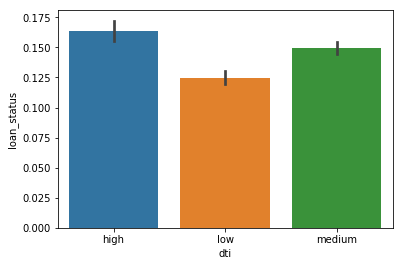

In [78]:
sns.barplot(x='dti',y='loan_status',data=loan_final)
plt.show()

### similarly with Funded amount (The total amount committed to that loan at that point in time).

In [79]:
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
loan_final['funded_amnt'] = loan_final['funded_amnt'].apply(lambda x: funded_amount(x))

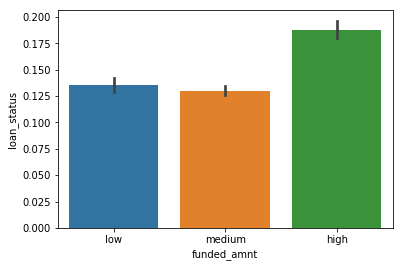

In [81]:
sns.barplot(x='funded_amnt',y='loan_status',data=loan_final)
plt.show()

In [82]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan_final['installment'] = loan_final['installment'].apply(lambda x: installment(x))

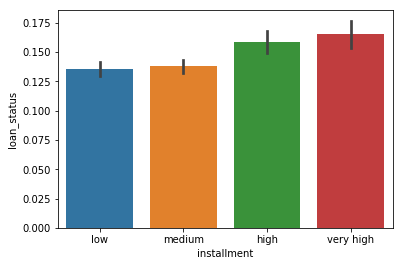

In [83]:
sns.barplot(x='installment',y='loan_status',data=loan_final)
plt.show()

In [84]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan_final['annual_inc'] = loan_final['annual_inc'].apply(lambda x: annual_income(x))

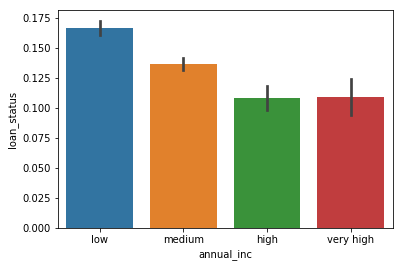

In [85]:
sns.barplot(x='annual_inc',y='loan_status',data=loan_final)
plt.show()

### clearly people having low salary has highest default rate
#### on the basis of experience we can divide the emp_length into fresher, experience,junior,senior etc

In [86]:
loan_final = loan_final[~loan_final['emp_length'].isnull()]

In [87]:
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior_exp'
    elif n > 3 and n <=7:
        return 'senior_exp'
    else:
        return 'expert'

loan_final['emp_length'] = loan_final['emp_length'].apply(lambda x: emp_length(x))

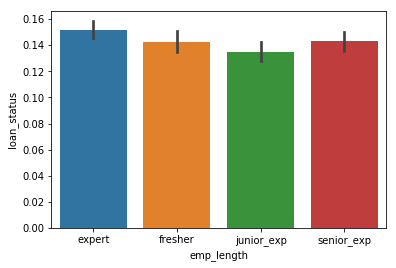

In [88]:
sns.barplot(x='emp_length',y='loan_status',data=loan_final)
plt.show()

## 6. SEGMENTED UNIVARIATE ANALYSIS

### purpose of loan variable is observed on the basis of number of loans. Above we have observed that small_business has the highest default_rate.

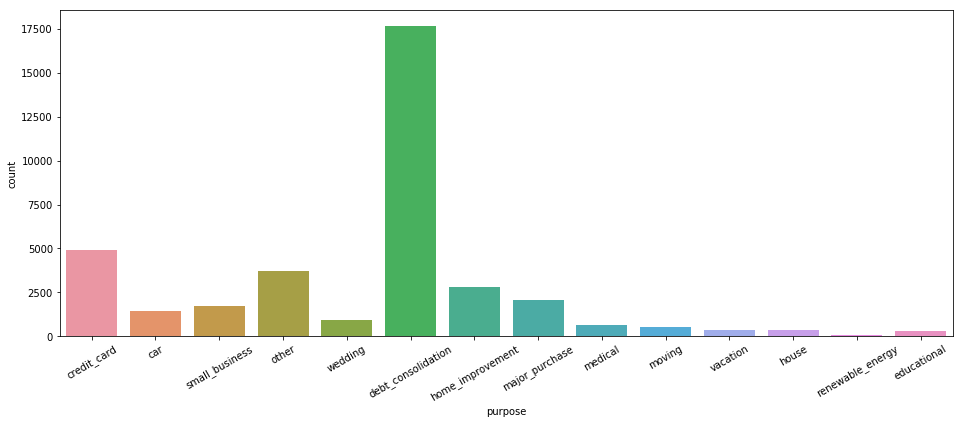

In [89]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=30)
sns.countplot(x='purpose', data=loan_final)
plt.show()

### if we ignore other then after debt_consolidation we have credit_card,home_improvement,major_purchase. Now we will consider these 4 for our further anlaysis

In [91]:
main = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_final = loan_final[loan_final['purpose'].isin(main)]
loan_final['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

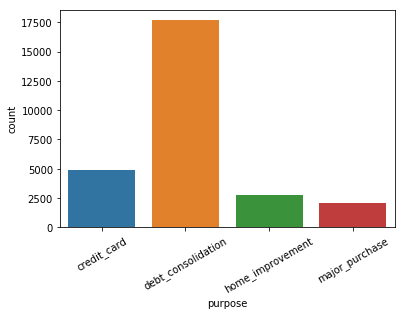

In [93]:
sns.countplot(x=loan_final['purpose'])
plt.xticks(rotation=30)
plt.show()

## let's now compare the default rates across two types of categorical variables

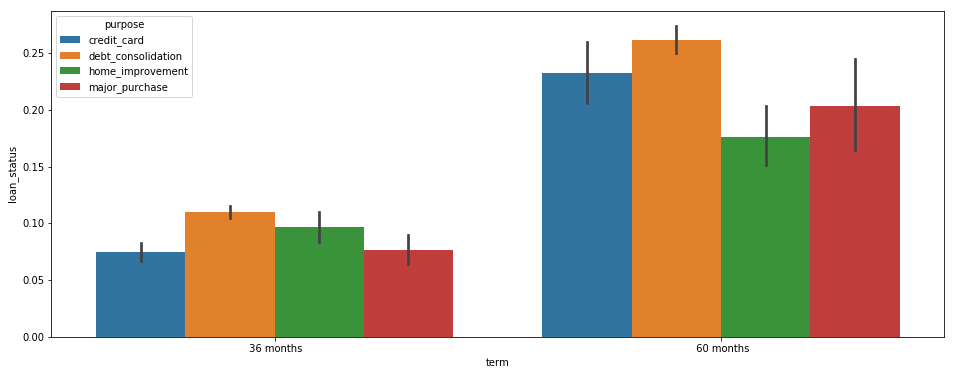

In [94]:
plt.figure(figsize=[16, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### in both 36 months and 60 months we have debt_consolidation with the highest default rate

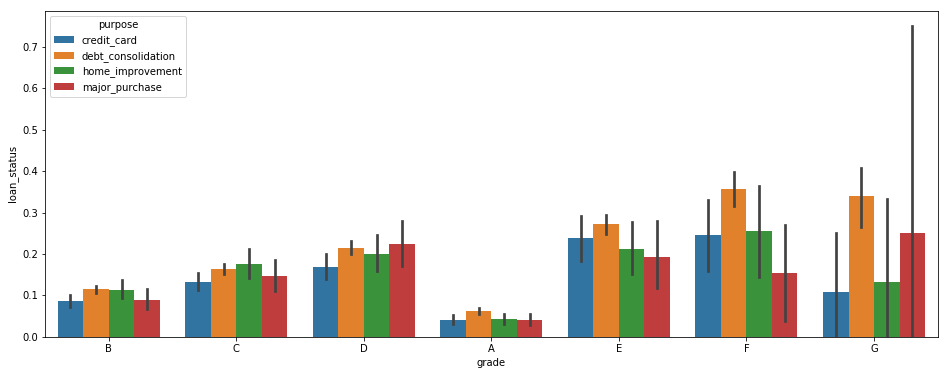

In [95]:
plt.figure(figsize=[16, 6])
sns.barplot(x='grade', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### from abouve grade F seems to have the highest default rate and in F grade debt_consolidation is the highest one

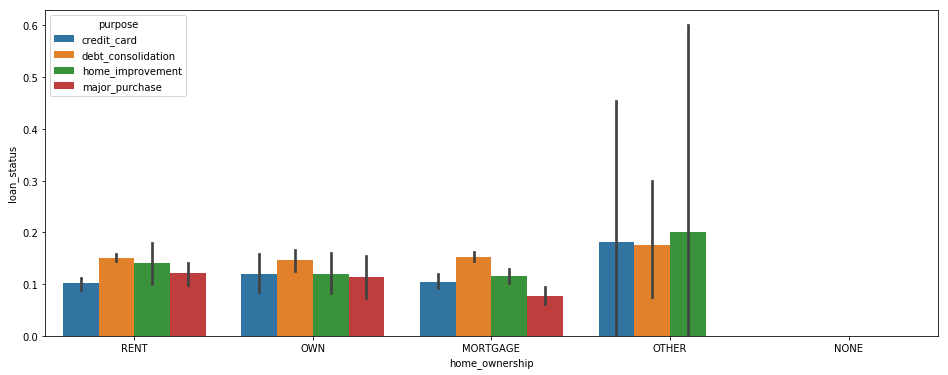

In [96]:
plt.figure(figsize=[16, 6])
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### if we ignore other then all other home_ownership seems to have similar default rate and in all dept_consolidation purpose of the loan has the highest rate

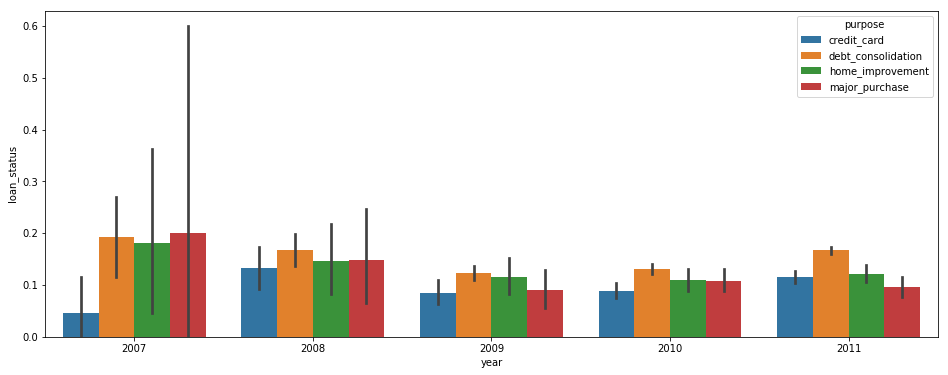

In [97]:
plt.figure(figsize=[16, 6])
sns.barplot(x='year', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### in year 2007 we have the highest default rate and then it decreases in 2008 and in 2009 and 2010 the default rate remains same and in 2011 again increases and debt_consolidation has the highest rate 

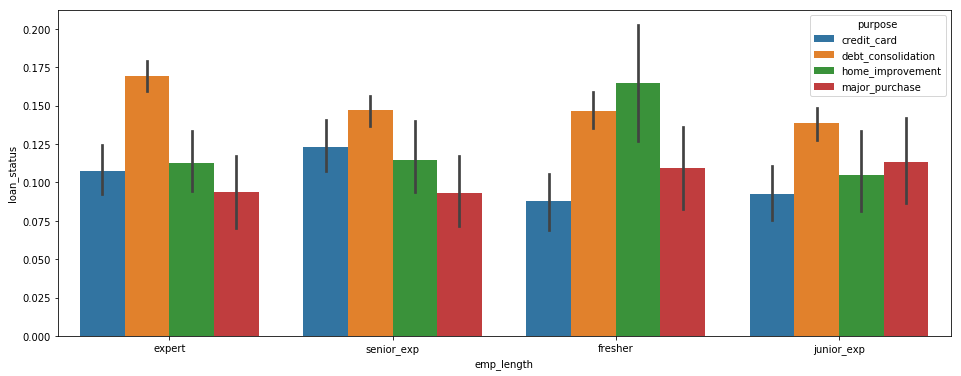

In [98]:
plt.figure(figsize=[16, 6])
sns.barplot(x='emp_length', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### freshers likely to default more and fresher whose purpose of loan is home_improvement are the most defaulties one

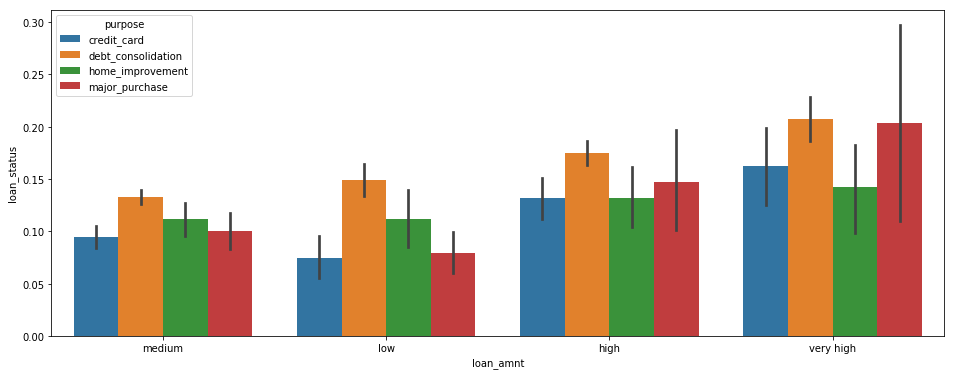

In [99]:
plt.figure(figsize=[16, 6])
sns.barplot(x='loan_amnt', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### for highest loan amount i.e >=25000 we have the more defaulties and in that major_purpose and debt_consolidation contains more  defaulties

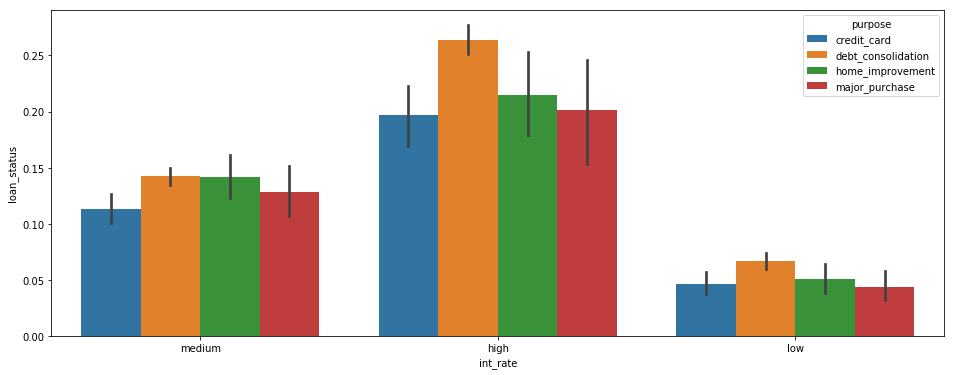

In [100]:
plt.figure(figsize=[16, 6])
sns.barplot(x='int_rate', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### loan taken for debt_consolidation with high interest rate has the highest default rate 

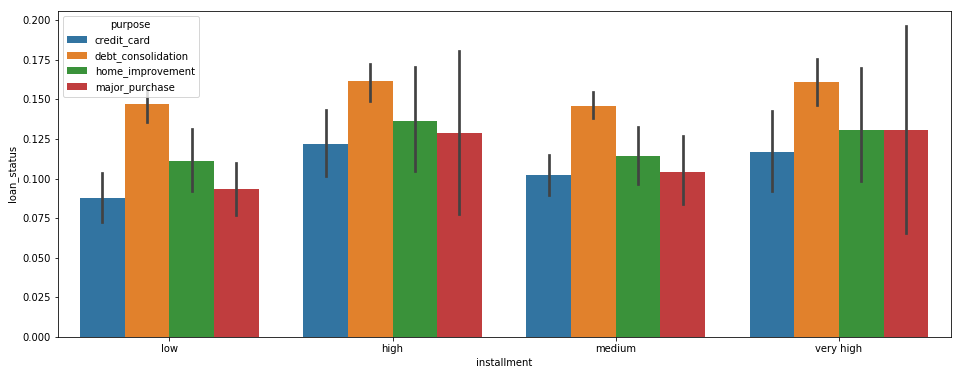

In [101]:
plt.figure(figsize=[16, 6])
sns.barplot(x='installment', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### the purpose of the loan is debt_consolidation and with the high or very high installments we have the most defaulties 

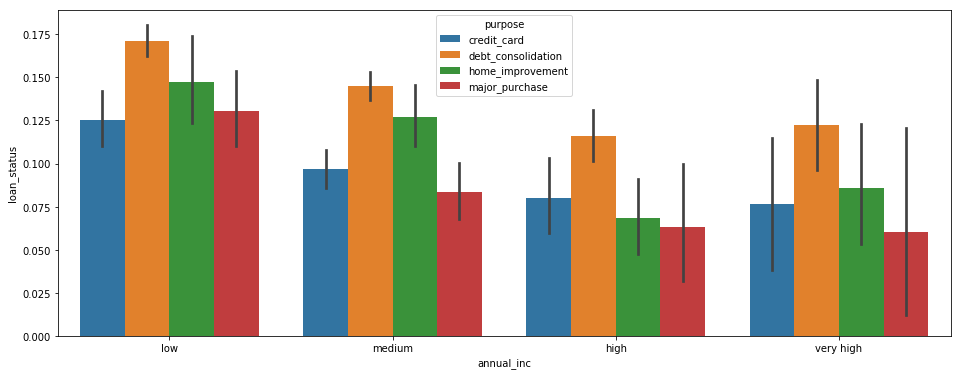

In [102]:
plt.figure(figsize=[16, 6])
sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=loan_final)
plt.show()

### the people having low annual income and among them who want loan for debt_consolidation has the highest default rate

## 7. we can also compute the 'difference between the highest and the lowest default rate' across the categories, which is  indicating the effect of the varaible on default rate
### now we will try to calculate diff b/w the highest and lowest default rates  in diff variables
#### 1. annual income

In [106]:
loan_final.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [105]:
default_rates=loan_final.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)
round((default_rates[0] - default_rates[-1]), 2)

0.06

#### there is a 6% increase in default rate as we go from high to low

#### 2. loan amount

In [107]:
loan_final.groupby('loan_amnt').loan_status.mean().sort_values(ascending=False)

loan_amnt
very high    0.192518
high         0.162739
medium       0.120941
low          0.118952
Name: loan_status, dtype: float64

In [109]:
default_rates1=loan_final.groupby('loan_amnt').loan_status.mean().sort_values(ascending=False)
round((default_rates1[0] - default_rates1[-1]), 2)

0.07

#### there is a 7% increase in default rate as we go from low to very high in loan amount 

#### 3. funded amount (amount set by lending club company)

In [111]:
default_rates2=loan_final.groupby('funded_amnt').loan_status.mean().sort_values(ascending=False)
print(default_rates2)
round((default_rates2[0] - default_rates2[-1]), 2)

funded_amnt
high      0.176849
medium    0.123023
low       0.122050
Name: loan_status, dtype: float64


0.05

#### there is a increase of 5% as we move from low to high in funded amount set by lending club company

#### 4. funded_amnt_inv amount set by investors

In [112]:
default_rates3=loan_final.groupby('funded_amnt_inv').loan_status.mean().sort_values(ascending=False)
print(default_rates3)
round((default_rates3[0] - default_rates3[-1]), 2)

funded_amnt_inv
very high    0.180766
high         0.170075
low          0.131734
medium       0.121828
Name: loan_status, dtype: float64


0.06

#### there is increase of 6% as we move from high to very high in funded amount set by investors

#### 5. term (in months the the time by which loan can be issues either 36 or 60)

In [113]:
default_rates4=loan_final.groupby('term').loan_status.mean().sort_values(ascending=False)
print(default_rates4)
round((default_rates4[0] - default_rates4[-1]), 2)

term
 60 months    0.245095
 36 months    0.099039
Name: loan_status, dtype: float64


0.15

#### there is huge diff as we can see from 36 to 60 months 

#### 6. int_rate interest rate

In [114]:
default_rates5=loan_final.groupby('int_rate').loan_status.mean().sort_values(ascending=False)
print(default_rates5)
round((default_rates5[0] - default_rates5[-1]), 2)

int_rate
high      0.247708
medium    0.135779
low       0.057907
Name: loan_status, dtype: float64


0.19

#### there is a increase of 19% default rate as we move the interest from low to high

#### 7. installment (monthly payment paid by the owned by the borrower)

In [115]:
default_rates6=loan_final.groupby('installment').loan_status.mean().sort_values(ascending=False)
print(default_rates6)
round((default_rates6[0] - default_rates6[-1]), 2)

installment
high         0.151245
very high    0.149563
medium       0.132338
low          0.124067
Name: loan_status, dtype: float64


0.03

#### there is increase of 2% from low to very high and 3% increase from low to high

#### 8. purpose(purpose of the loan)

In [116]:
default_rates7=loan_final.groupby('purpose').loan_status.mean().sort_values(ascending=False)
print(default_rates7)
round((default_rates7[0] - default_rates7[-1]), 2)

purpose
debt_consolidation    0.151570
home_improvement      0.118492
credit_card           0.104103
major_purchase        0.101442
Name: loan_status, dtype: float64


0.05

#### there is 5% increase of default rate from major_purpose to debt_consolidation

#### 9. grade(grades decided by lending club company for diff types of loans

In [118]:
default_rates8=loan_final.groupby('grade').loan_status.mean().sort_values(ascending=False)
print(default_rates8)
round((default_rates8[0] - default_rates8[-1]), 2)

grade
F    0.326418
G    0.291866
E    0.258291
D    0.207573
C    0.158259
B    0.107344
A    0.052670
Name: loan_status, dtype: float64


0.27

#### so we can see that there is huge diff b/w A and F 

#### 10. emp_length (exp of the employees)

In [119]:
default_rates9=loan_final.groupby('emp_length').loan_status.mean().sort_values(ascending=False)
print(default_rates9)
round((default_rates9[0] - default_rates9[-1]), 2)

emp_length
expert        0.146238
senior_exp    0.135371
fresher       0.132705
junior_exp    0.125000
Name: loan_status, dtype: float64


0.02

#### there is 2% increase in default rate from junior exp to expert.

#### 11.home_ownership(type of home)

In [122]:
default_rates10=loan_final.groupby('home_ownership').loan_status.mean().sort_values(ascending=False)
print(default_rates10)
round((default_rates10[0] - default_rates10[-2]), 2)

home_ownership
OTHER       0.158730
RENT        0.139228
OWN         0.135448
MORTGAGE    0.132571
NONE        0.000000
Name: loan_status, dtype: float64


0.03

#### ignoring the NONE  there is a 3% increase of default rate from mortage to other type of houses

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------